# Electric Vehicles Market Size Analysis using Python

In [2]:
import pandas as pd
ev_data = pd.read_csv('Electric_Vehicle_Population_Data 2.csv')
print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

<small>*Source: https://data.gov/*</small>

In [3]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [4]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [5]:
ev_data = ev_data.dropna()

## Analyzing the Growth of EV Adoption Over Time.

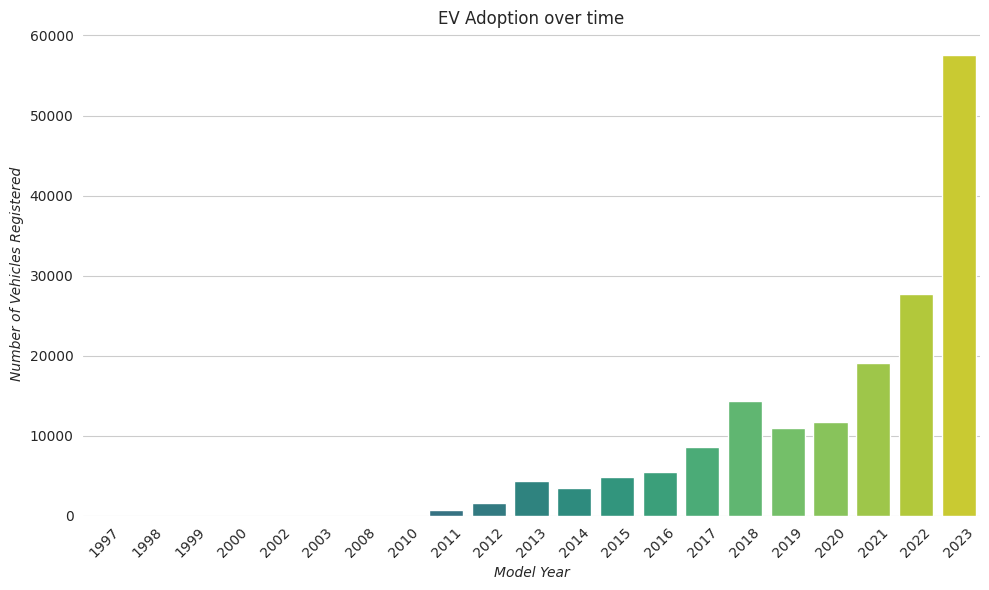

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style('whitegrid')

#EV Adoption over time

plt.figure(figsize= (10,6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
ev_adoption_by_year = ev_adoption_by_year[ev_adoption_by_year.index != 2024] # Exclude 2024 from the data
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette='viridis')
plt.title('EV Adoption over time')
plt.xlabel('Model Year', fontstyle='italic')
plt.ylabel('Number of Vehicles Registered', fontstyle='italic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.box(False)
plt.show()

<small>*Source: https://data.gov/*</small>

## Electric Vehicle Adoption Trends

The bar chart reveals a compelling narrative of electric vehicle (EV) adoption over time:

### Gradual Growth Phase
From the beginning of the timeline until approximately 2016, EV registrations showed a modest but steady increase. In the early adoption phase, we can abserve EVs gaining traction but they had not yet reached mainstream popularity.

### Acceleration Period
Starting around 2017, the data indicates a notable shift in adoption rates. The number of registered EVs began to grow more rapidly, suggesting a growing public interest and improved accessibility of electric vehicles.

### Peak Adoption
The most striking feature of the chart is the dramatic surge in EV registrations for the year 2023. This bar towers above all others. The sharp increase suggests a possible tipping point where EVs have transitioned from an alternative option to a preferred choice for many consumers.

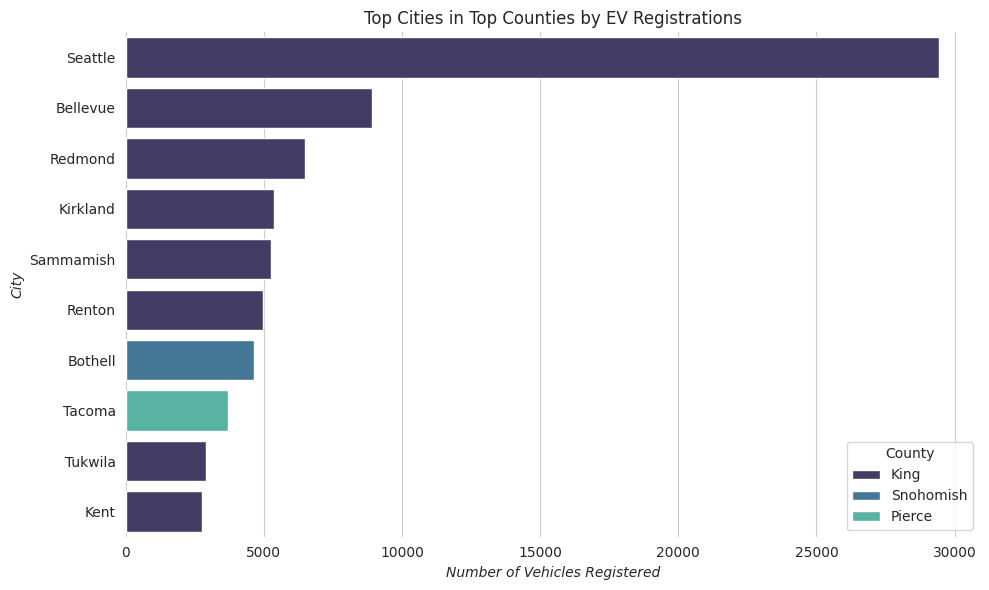

In [7]:
# geographical distribution at county level
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="mako")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered', fontstyle='italic')
plt.ylabel('City', fontstyle='italic')
plt.legend(title='County')
plt.tight_layout()
plt.box(False)
plt.show()

<small>*Source: https://data.gov/*</small>


The above graph compares the number of electric vehicles registered in various cities within three counties: King, Snohomish, and Pierce. Here are the key findings from the above graph:

King County, has three of the cities with highest number of EV registrations. 

### Key Observations

- Seattle leads significantly in EV registrations.
- Bellevue and Redmond follow, but with much lower numbers.
- Kirkland and Sammamish in Snohomish County show moderate EV adoption.
- Tacoma and Tukwila in Pierce County have the lowest registrations among listed cities.
- King County dominates in EV adoption, hosting most cities with high registration numbers.

This data reveals a concentrated EV adoption pattern, with King County, particularly Seattle, at the forefront of the transition to electric vehicles.

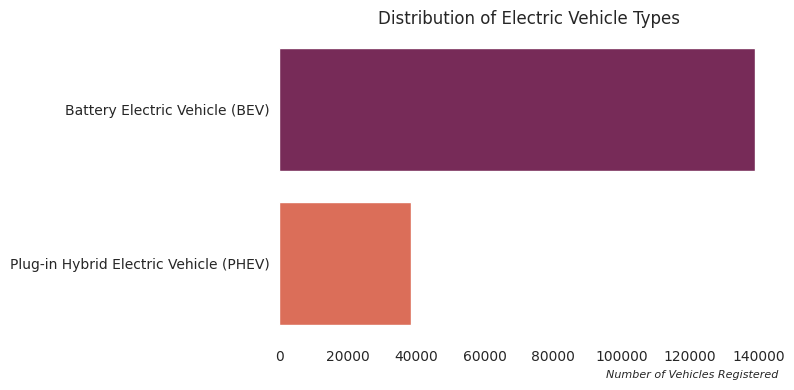

In [8]:
# analyzing the distribution of electric vehicle Types
warnings.filterwarnings("ignore")
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()
sns.set_style('white')
plt.figure(figsize=(8, 4))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered', fontsize=8, fontstyle='italic', loc='right')
plt.ylabel('', fontsize=8, fontstyle='italic')
plt.tight_layout()
plt.box(False)
plt.show()

<small>*Source: https://data.gov/*</small>

The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered.

## Which Manufacturers and Models Dominate the EV Market?

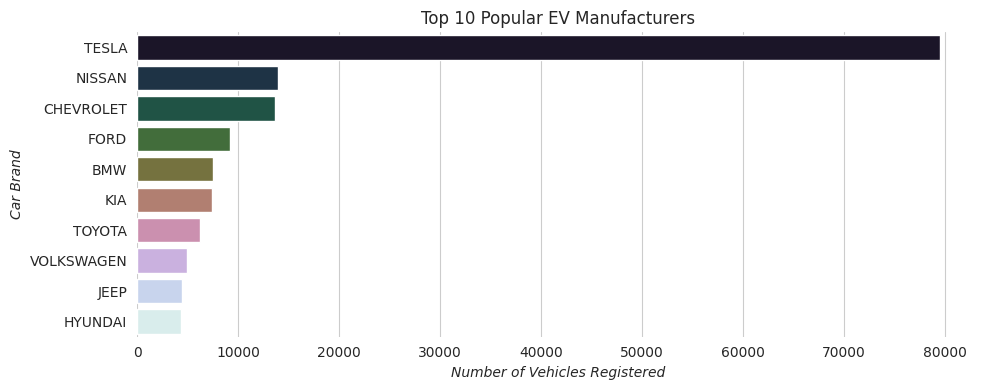

In [9]:
# analyzing the popularity of EV manufacturers
warnings.filterwarnings("ignore")
ev_make_distribution = ev_data['Make'].value_counts().head(10)  # Limiting to top 10 for clarity
sns.set_style('whitegrid')
plt.figure(figsize=(10, 4))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Manufacturers')
plt.xlabel('Number of Vehicles Registered', fontstyle='italic')
plt.ylabel('Car Brand', fontstyle='italic')
plt.tight_layout()
plt.box(False)
plt.show()

<small>*Source: https://data.gov/*</small>


The above chart indicates that:

- **TESLA** has the highest number of registered vehicles by a wide margin.
- **NISSAN** ranks second, followed by **CHEVROLET**, both with significantly fewer registrations than TESLA.
- Other manufacturers, including **FORD**, **BMW**, **KIA**, **TOYOTA**, **VOLKSWAGEN**, **JEEP**, and **HYUNDAI**, follow in descending order of registrations.

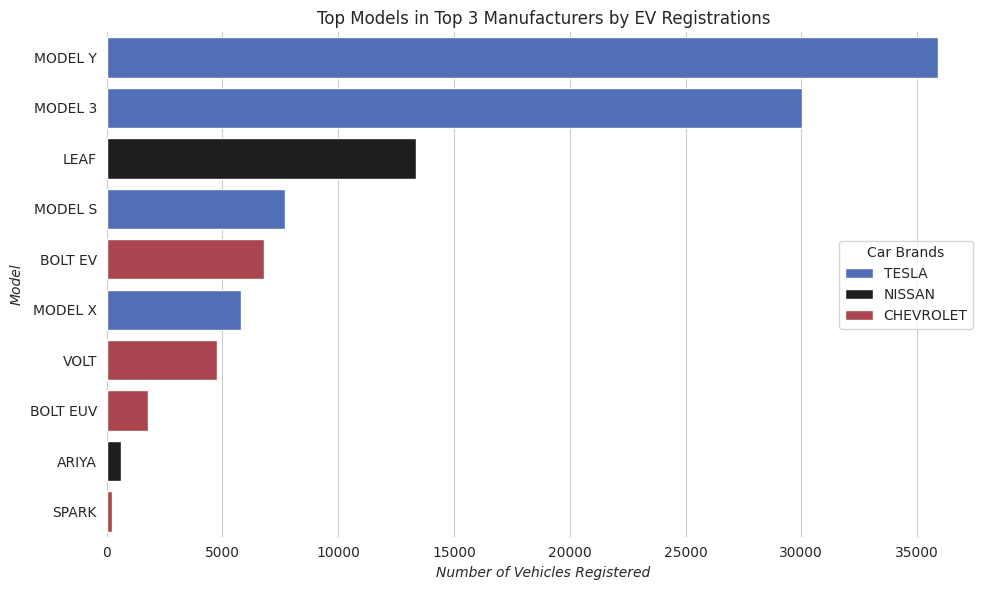

In [10]:
# top 3 manufacturers based on the number of vehicles registered
top_3_manufacturers = ev_make_distribution.head(3).index

# filtering the dataset for these top manufacturers
top_manufacturers_data = ev_data[ev_data['Make'].isin(top_3_manufacturers)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_manufacturers_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="icefire")
plt.title('Top Models in Top 3 Manufacturers by EV Registrations')
plt.xlabel('Number of Vehicles Registered', fontstyle='italic')
plt.ylabel('Model', fontstyle='italic')
plt.legend(title='Car Brands', loc='center right')
plt.tight_layout()
plt.box(False)
plt.show()

<small>*Source: https://data.gov/*</small>

The above graph shows the distribution of electric vehicle registrations among different models from the top three manufacturers: **TESLA**, **NISSAN**, and **CHEVROLET**. It indicates that:

- **TESLA**’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.
- **NISSAN**’s LEAF is the third most registered model and the most registered non-**TESLA** vehicle.
- **TESLA**’s MODEL S and MODEL X also have a significant number of registrations.
- **CHEVROLET**’s BOLT EUV and VOLT are the next in the ranking with considerable registrations, followed by BOLT EUV.
- **NISSAN**’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown.

From the top three brands : TESLA, CHEVROLET and NISSAN, let's visualize electric ranges. 

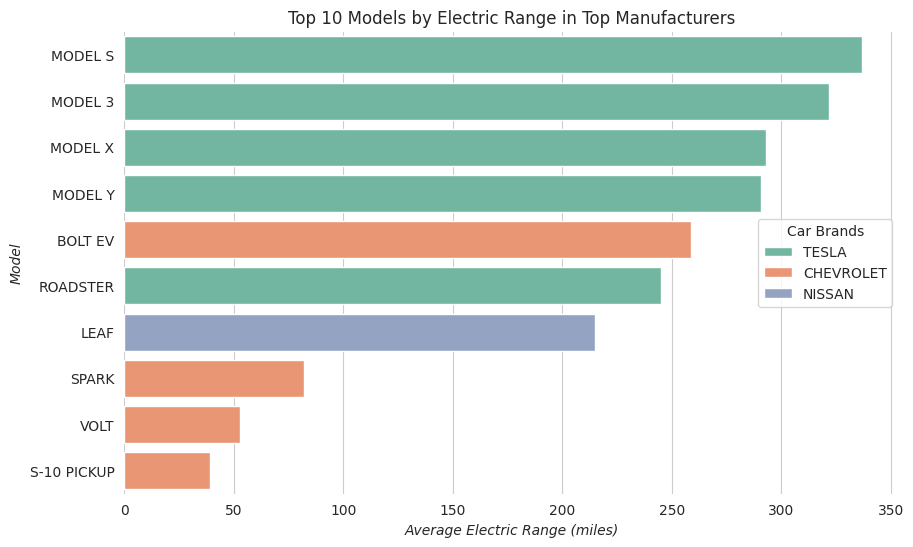

In [11]:
# remove the zero values 
top_manufacturers_data_clean = top_manufacturers_data[top_manufacturers_data['Electric Range'] != 0]

range_by_model = top_manufacturers_data_clean.groupby(['Make', 'Model'])['Electric Range'].max().sort_values(ascending=False).reset_index()

# visualize only the top 10 models with the highest average electric range
top_range_models = range_by_model.head(10)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="Set2")
plt.title('Top 10 Models by Electric Range in Top Manufacturers')
plt.xlabel('Average Electric Range (miles)', fontstyle='italic')
plt.ylabel('Model', fontstyle='italic')
plt.legend(title='Car Brands', loc='center right')
plt.box(False)
plt.show()

<small>*Source: https://data.gov/*</small>

The above bar chart displays the top 10 models by electric range from the top three manufacturers.  **TESLA** dominates the list with four models, led by the MODEL S, showcasing its leadership in electric vehicle range. The **CHEVROLET** BOLT EV stands out among **CHEVROLET** models, significantly outperforming the PHEVs VOLT and S-10 PICKUP. Meanwhile, the **NISSAN** LEAF and **CHEVROLET** SPARK fall in the lower half, indicating more modest ranges compared to the top performers.

In [12]:
# list of the 10 vehicles
vehicle_models = ['ROADSTER', 'MODEL S', 'MODEL X', 'MODEL 3', 
                  'MODEL Y', 'BOLT EV', 'LEAF', 'VOLT', 
                  'SPARK', 'S-10 PICKUP']

# empty dictionary to store the results
max_ranges = {}

# loop through each vehicle model
for model in vehicle_models:
    # filter 
    model_data = ev_data[ev_data['Model'] == model]

    # exclude zero values in the 'Electric Range' column
    model_data = model_data[model_data['Electric Range'] > 0]
    
    # Find the min electric range for the current model
    max_range = model_data['Electric Range'].max()
    
    # store the result in the dictionary
    max_ranges[model] = max_range

# print the results with model name and maximum range
for model, max_range in max_ranges.items():
    print(f"Model: {model}, Maximum Electric Range (2020): {max_range} miles")


Model: ROADSTER, Maximum Electric Range (2020): 245 miles
Model: MODEL S, Maximum Electric Range (2020): 337 miles
Model: MODEL X, Maximum Electric Range (2020): 293 miles
Model: MODEL 3, Maximum Electric Range (2020): 322 miles
Model: MODEL Y, Maximum Electric Range (2020): 291 miles
Model: BOLT EV, Maximum Electric Range (2020): 259 miles
Model: LEAF, Maximum Electric Range (2020): 215 miles
Model: VOLT, Maximum Electric Range (2020): 53 miles
Model: SPARK, Maximum Electric Range (2020): 82 miles
Model: S-10 PICKUP, Maximum Electric Range (2020): 39 miles


## How Has the Electric Range Evolved by Model Since 2008?

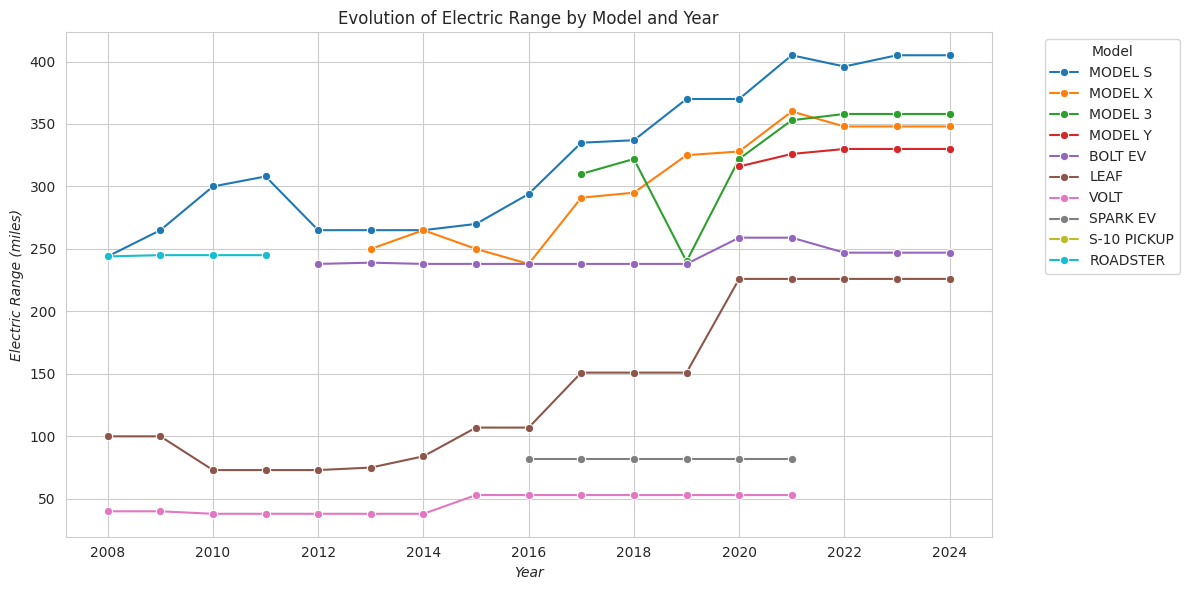

In [13]:
file_path = 'electric_vehicle_ranges_evolution.csv'
ev_range_data = pd.read_csv(file_path)

# reshape the data from wide to long format
range_long = pd.melt(ev_range_data, id_vars=['Model'], 
                     var_name='Year', 
                     value_name='Electric Range (miles)')

# clean the 'Year' column to remove the word 'Range' and convert it to numeric
range_long['Year'] = range_long['Year'].str.extract('(\d+)').astype(int)


plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Electric Range (miles)', hue='Model', data=range_long, marker='o')
plt.title('Evolution of Electric Range by Model and Year')
plt.xlabel('Year', fontstyle='italic')
plt.ylabel('Electric Range (miles)', fontstyle='italic')
plt.grid(True)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Tesla models dominate the list with higher average ranges due to their consistent improvements.
The original Tesla Roadster was discontinued in 2012. Production of the Roadster ended to allow Tesla to focus on developing newer models, such as the Model S, which was launched in 2012. However, Tesla announced a second-generation Roadster in 2017, which is expected to have impressive performance and range capabilities. The new Roadster has not yet been released, but it is anticipated to have a range of over 600 miles.

There is a noticeable trend of increasing electric ranges across most models, indicating improvements in battery technology and efficiency over time.

## Why Battery Technology Matters?

The battery is the most critical component of an electric vehicle. It determines the car’s range, charging time, performance, and overall cost. As such, advancements in battery technology directly impact the feasibility and appeal of electric cars.

In [14]:
ev_batteries_data = pd.read_csv('electric_cars_batteries.csv')
print(ev_batteries_data.head())

     Year  BEV average price (USD) Global Sales Volume Mileage (Km)  \
0  2010.0                  64032.0               50000          127   
1  2011.0                  51736.0               60000          139   
2  2012.0                  52084.0               80000          160   
3  2013.0                  56028.0              150000          189   
4  2014.0                  44776.0              224700          210   

   Lithium Ion Battery Price (USD)  Unnamed: 5  Unnamed: 6  \
0                           1191.0         NaN         NaN   
1                            924.0         NaN         NaN   
2                            726.0         NaN         NaN   
3                            668.0         NaN         NaN   
4                            592.0         NaN         NaN   

   Average price of new car  
0                   37500.0  
1                   37311.0  
2                   36874.0  
3                   37826.0  
4                   37519.0  


<small>*Source: Electric Data IEA, Bloomberg, Statistica*<small>

In [15]:
ev_batteries_data.columns

Index(['Year', 'BEV average price (USD)', 'Global Sales Volume',
       'Mileage (Km)', 'Lithium Ion Battery Price (USD)', 'Unnamed: 5',
       'Unnamed: 6', 'Average price of new car'],
      dtype='object')

In [16]:
data_cleaned = ev_batteries_data.drop(columns=['Unnamed: 5', 'Unnamed: 6'])

In [17]:
data_cleaned = data_cleaned.dropna(subset=['Year', 'Lithium Ion Battery Price (USD)'])

## The evolution of Lithium Ion Battery prices over time
The majority of electric vehicles today use lithium-ion batteries, which offer a good balance between energy density, cost, and longevity.

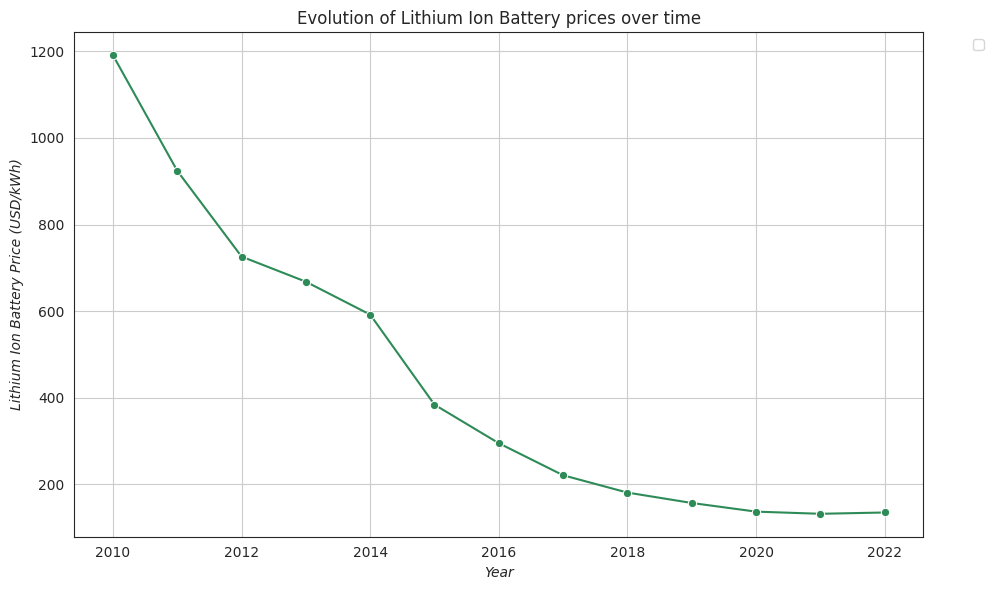

In [18]:
sns.set_style('white')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Lithium Ion Battery Price (USD)', data=data_cleaned, marker='o', color='seagreen')
plt.title('Evolution of Lithium Ion Battery prices over time')
plt.xlabel('Year', fontstyle='italic')
plt.ylabel('Lithium Ion Battery Price (USD/kWh)', fontstyle='italic')
plt.grid(True)
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<small>*Source: Electric Data IEA, Bloomberg, Statistica*<small>


The above chart shows the prices for lithium-ion batteries have been steadily dropping since 2010. This decline in cost has a direct and significant impact on electric vehicle (EV) range. As battery prices decrease, manufacturers can either increase battery capacity for the same cost or reduce the price of vehicles while maintaining their range.

 This trend has helped make EVs a viable alternative to internal combustion engine vehicles.

Now, let’s move forward towards finding the estimated market size of electric vehicles. I’ll first count the number of EVs registered every year:

## Estimated Market Size Analysis of Electric Vehicles

In [19]:
# calculate the number of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts.head

<bound method NDFrame.head of Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64>

The dataset provides the number of electric vehicles registered each year from 1997 through 2024. However, the data for 2024 is incomplete as it only contains the data till March. Here’s a summary of EV registrations for recent years:

In 2021, there were 19,063 EVs registered.
In 2022, the number increased to 27708 EVs.
In 2023, a significant jump to 57,519 EVs was observed.

The analysis reveals a continuous upward trend in EV registrations over the years, driven by two factors:

- **Lower Battery Costs** *(As lithium-ion battery prices drop, electric vehicles become more affordable, leading to wider adoption.)*
- **Advancements in Technology** *(Improvements in range and performance have made EVs more appealing to consumers.)*

## Forecasting EV Registrations 

To estimate the total number of EVs projected for registration in 2024, we will utilize a growth rate-based approach.

We will calculate the Compound Annual Growth Rate (CAGR) between the most recent year with complete data (2023) and an earlier year to project the figures for 2024. Additionally, we will apply this growth rate to forecast the market size for the next five years.

In [20]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{np.int64(2024): np.float64(79079.2066611501), np.int64(2025): np.float64(119653.95934090775), np.int64(2026): np.float64(181047.21317328632), np.int64(2027): np.float64(273940.7335817853), np.int64(2028): np.float64(414496.9933533305), np.int64(2029): np.float64(627171.2689549965)}


In [21]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a list to display the forecasted values
forecasted_list = [(year, value) for year, value in zip(forecast_years + filtered_years.index.min(), forecasted_values)]

# print the forecasted values as a list
for year, prediction in forecasted_list:
    print(f"Year: {year}, Predicted EV Registrations: {prediction:.0f}")

Year: 2024, Predicted EV Registrations: 79079
Year: 2025, Predicted EV Registrations: 119654
Year: 2026, Predicted EV Registrations: 181047
Year: 2027, Predicted EV Registrations: 273941
Year: 2028, Predicted EV Registrations: 414497
Year: 2029, Predicted EV Registrations: 627171


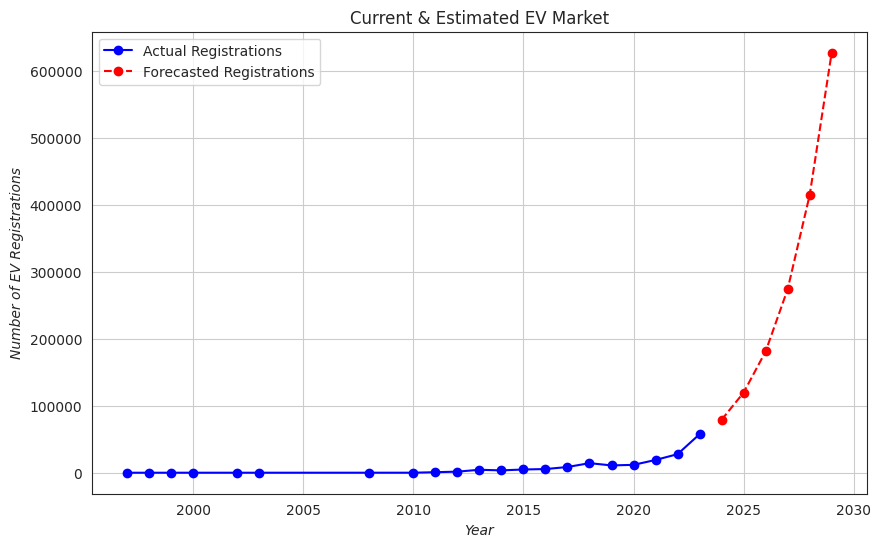

In [24]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(10, 6))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year', fontstyle='italic')
plt.ylabel('Number of EV Registrations', fontstyle='italic')
plt.legend()
plt.grid(True)
plt.show()

The graph above illustrates the following key observations:

Actual EV registrations remained low and stable until approximately 2010, after which a notable and consistent upward trend emerged, reflecting a significant increase in EV adoption.
Forecasted EV registrations indicate an even more pronounced surge in the near future, with expectations of a sharp rise in the coming years.

Given the upward trajectory of actual EV registrations and the projected acceleration in the forecast data, it is clear that the EV market is set for substantial growth. The steep increase in anticipated registrations suggests a growing consumer acceptance of EVs, which is likely to continue. Overall, the data indicates a promising outlook for the EV industry, highlighting a significant shift in consumer preferences and potential growth in investment and business opportunities.